In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('Housing.csv')

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
data.shape

(545, 13)

In [9]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


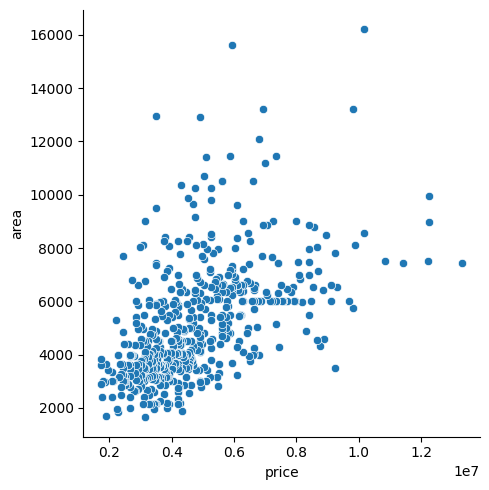

In [11]:
sns.relplot(x='price',y='area',data = data)

<Axes: >

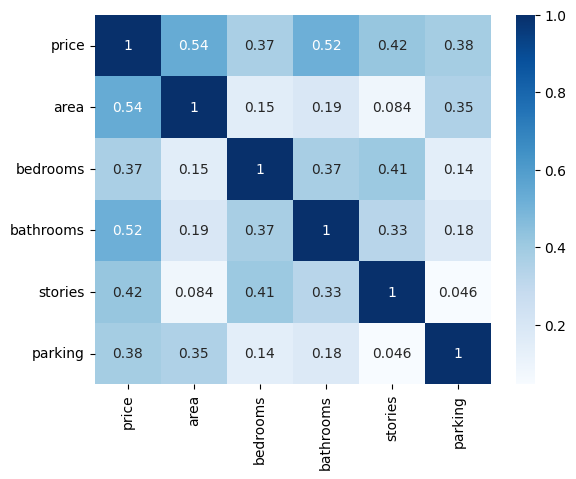

In [13]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='Blues')

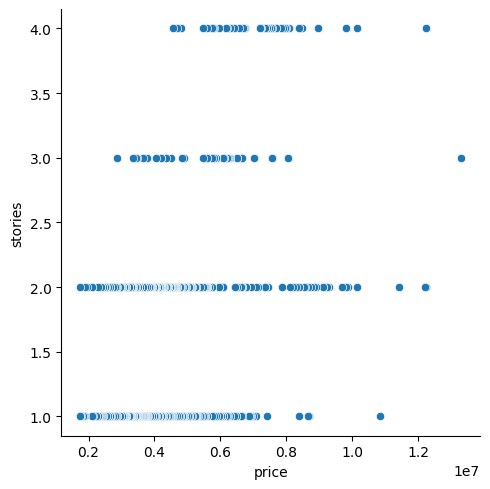

In [14]:
sns.relplot(x='price',y='stories',data=data)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [17]:
train = data.drop(['price'], axis = 1)
test = data['price']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=2)

In [19]:
regr = LinearRegression()

In [22]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True) # Converting the categorical values from yes/no to 0/1
regr.fit(X_train_encoded,y_train)

LinearRegression()

In [25]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
regr.predict(X_test_encoded)

array([ 3309685.59064911,  4887305.0279502 ,  2308052.97557245,
        3243086.77840356,  6403520.48194041,  4109814.22946256,
        3642689.76924171,  2994172.61261016,  3922804.2132919 ,
        3195041.17552913,  3626644.07348575,  3203687.9796793 ,
        3643481.71656397,  5066811.12058917,  4829353.29046224,
        6889009.92294499,  7222377.86896402,  4703412.29123684,
        2875542.59049553,  4451616.45886967,  5650105.21342977,
        4686121.79910969,  4890488.32134951,  6300823.37828906,
        2069761.33134599,  2645009.64396548,  2653206.28376134,
        4222647.89386882,  4804074.67515444,  3294281.56471327,
        5000259.12757547,  3988091.50899895,  3941293.4906304 ,
        4845714.89545604,  4153966.30996584,  7366076.49837795,
        2434240.91139637,  5117726.54479177,  4987359.08257952,
        2646503.15529017,  6949284.80109105,  3239472.83460799,
        3579301.42846748,  4261226.47381342,  3019170.71723322,
        3835568.20144053,  3025558.77638

In [26]:
regr.score(X_test_encoded,y_test)

0.653543370688221